In [18]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pickle

# Import des modules contenant les fonctions utilitaires
import src.helpers as helpers

In [4]:
# Réglage des graphiques

plt.style.use('seaborn-whitegrid')

plt.rc('font', size=14)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=18)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=14)

dims_fig = (10,6)

## Analyse du jeu de données

In [5]:
data_path = 'data/articles/'
clicks_path = data_path + 'clicks/'

In [6]:
for file in os.listdir(data_path):
    print(file)

articles_embeddings.pickle
articles_metadata.csv
clicks
clicks_sample.csv


- **articles_metadata.csv** : fichier CSV contenant des informations sur tous les articles publiés (364047)
- **articles_embeddings.pickle** : fichier au format pickle contenant un plongement de tous les articles de dimensionalité 250 x 364047, entraîné sur les textes des articles
- **clicks** : dossier avec des fichiers csv (un par heure), contenant les intéractions des sessions des utilisateurs
- **clicks_sample.csv** : fichier CSV contenant un échantillon des intéractions des sessions des utilisateurs

#### articles_metadata.csv

In [7]:
articles_df = pd.read_csv(data_path + 'articles_metadata.csv')
articles_df.head()

,article_id,category_id,created_at_ts,publisher_id,words_count
0,0,0,1513144419000,0,168
1,1,1,1405341936000,0,189
2,2,1,1408667706000,0,250
3,3,1,1408468313000,0,230
4,4,1,1407071171000,0,162


Expliquer les différentes colonnes

.....
.....

In [8]:
articles_df.describe()

,article_id,category_id,created_at_ts,publisher_id,words_count
count,364047.000000,364047.000000,3.640470e+05,364047.0,364047.000000
mean,182023.000000,283.108239,1.474070e+12,0.0,190.897727
std,105091.461061,136.723470,4.293038e+10,0.0,59.502766
min,0.000000,0.000000,1.159356e+12,0.0,0.000000
25%,91011.500000,199.000000,1.444925e+12,0.0,159.000000
50%,182023.000000,301.000000,1.489422e+12,0.0,186.000000
75%,273034.500000,399.000000,1.509891e+12,0.0,218.000000
max,364046.000000,460.000000,1.520943e+12,0.0,6690.000000


In [9]:
articles_df.isna().mean()

article_id       0.0
category_id      0.0
created_at_ts    0.0
publisher_id     0.0
words_count      0.0
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

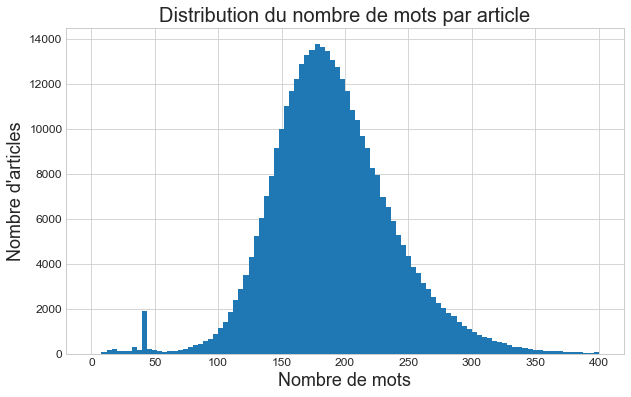

In [10]:
articles_df['words_count'].hist(figsize=dims_fig, bins=100, range=(0,400))
plt.xlabel("Nombre de mots")
plt.ylabel("Nombre d'articles")
plt.title("Distribution du nombre de mots par article")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

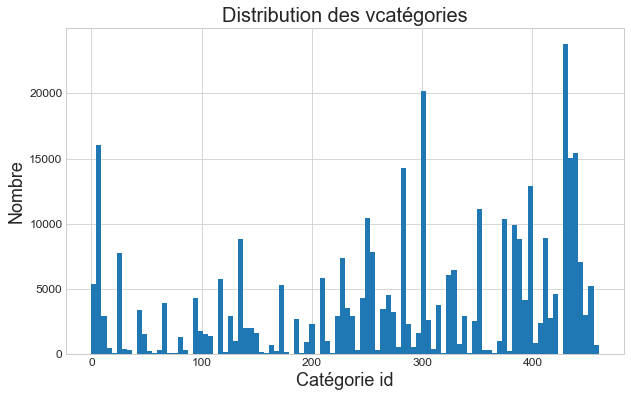

In [11]:
articles_df['category_id'].hist(figsize=dims_fig, bins=100)
plt.xlabel("Catégorie id")
plt.ylabel("Nombre")
plt.title("Distribution des vcatégories")
plt.show

#### clicks.csv

In [12]:
click_sample_df = pd.read_csv(data_path + 'clicks_sample.csv')
click_sample_df.head()

,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
0,0,1506825423271737,1506825423000,2,157541,1506826828020,4,3,20,1,20,2
1,0,1506825423271737,1506825423000,2,68866,1506826858020,4,3,20,1,20,2
2,1,1506825426267738,1506825426000,2,235840,1506827017951,4,1,17,1,16,2
3,1,1506825426267738,1506825426000,2,96663,1506827047951,4,1,17,1,16,2
4,2,1506825435299739,1506825435000,2,119592,1506827090575,4,1,17,1,24,2


Expliquer les différentes colonnes

.....
.....

Concaténer tous les fichiers click.csv

In [13]:
test = pd.read_csv('data/articles/clicks/clicks_hour_000.csv')
test.shape

(1883, 12)

In [14]:
clicks_df = helpers.get_all_clicks_files(clicks_path)
clicks_df.head()

,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
0,0,1506825423271737,1506825423000,2,157541,1506826828020,4,3,20,1,20,2
1,0,1506825423271737,1506825423000,2,68866,1506826858020,4,3,20,1,20,2
2,1,1506825426267738,1506825426000,2,235840,1506827017951,4,1,17,1,16,2
3,1,1506825426267738,1506825426000,2,96663,1506827047951,4,1,17,1,16,2
4,2,1506825435299739,1506825435000,2,119592,1506827090575,4,1,17,1,24,2


In [15]:
clicks_df.shape

(2988181, 12)

In [16]:
clicks_df.describe()

,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
count,2988181,2988181,2988181,2988181,2988181,2988181,2988181,2988181,2988181,2988181,2988181,2988181
unique,322897,1048594,646874,72,46033,2983198,3,5,8,11,28,7
top,5890,1507563657895091,1507563657000,2,160974,1506961009961,4,1,17,1,25,2
freq,1232,124,127,1260372,37213,3,2904478,1823162,1738138,2852406,804985,1602601


In [17]:
clicks_df = clicks_df[['user_id', 'session_id', 'session_size', 'click_article_id']]
print(clicks_df.shape)
clicks_df.head()

(2988181, 4)


,user_id,session_id,session_size,click_article_id
0,0,1506825423271737,2,157541
1,0,1506825423271737,2,68866
2,1,1506825426267738,2,235840
3,1,1506825426267738,2,96663
4,2,1506825435299739,2,119592
